## Imports

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import validation_curve
from sklearn.tree import plot_tree

## Datos

In [118]:
# Datos
cars = pd.read_csv('mtcars.csv')
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [119]:
# Estructura
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [120]:
X = cars['wt'].values.reshape(-1,1)
y = cars['mpg'].values

In [121]:
print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')

Shape X: (32, 1)
Shape y: (32,)


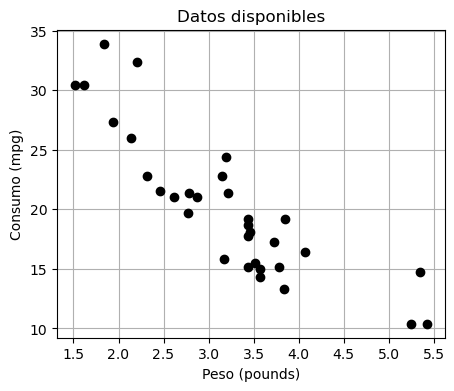

In [122]:
# Gráfica de datos de entrenamiento
plt.figure(figsize=(5,4))
plt.scatter(X, y, color='black', label='Datos', zorder=3)
plt.ylabel('Consumo (mpg)')
plt.xlabel('Peso (pounds)')
plt.title('Datos disponibles')
plt.grid(True)
plt.show()

## Regresión lineal con polinomios

In [123]:
degrees = 6
mse_train_vals = []
mse_cv_vals = []

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', LinearRegression())
    ])

    # Ajustar el modelo
    pipeline.fit(X, y)

    # Predecir y calcular errores
    y_pred = pipeline.predict(X)

    mse_train = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(pipeline, X, y, cv=32, scoring='neg_mean_squared_error'))

    mse_train_vals.append(mse_train)
    mse_cv_vals.append(mse_cv)

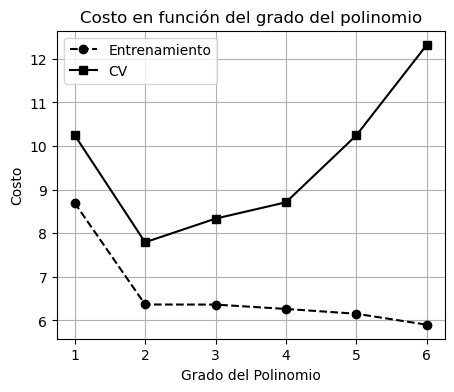

In [124]:
# Gráfica de evolución de MSE con grado del polinomio
plt.figure(figsize=(5,4))
plt.plot(range(1, degrees + 1), mse_train_vals, label='Entrenamiento', color='black', marker ='o', linestyle='--')
plt.plot(range(1, degrees + 1), mse_cv_vals, label='CV', color='black', marker ='s', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Costo')
plt.grid(True)
plt.xticks(range(1, degrees + 1))
plt.title('Costo en función del grado del polinomio')
plt.legend(loc='best')
plt.show()

## Regresión lineal Ridge

In [125]:
degrees = 6
ridge_mse_train_vals = []
ridge_mse_cv_vals = []

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', Ridge(alpha=0.1)) 
    ])

    # Ajustar el modelo
    pipeline.fit(X, y)

    # Predecir y calcular errores
    y_pred = pipeline.predict(X)

    mse_train = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(pipeline, X, y, cv=32, scoring='neg_mean_squared_error'))

    ridge_mse_train_vals.append(mse_train)
    ridge_mse_cv_vals.append(mse_cv)

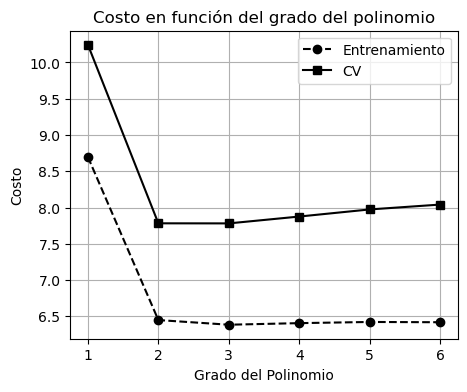

In [126]:
# Gráfica de evolución de MSE con grado del polinomio
plt.figure(figsize=(5,4))
plt.plot(range(1, degrees + 1), ridge_mse_train_vals, label='Entrenamiento', color='black', marker ='o', linestyle='--')
plt.plot(range(1, degrees + 1), ridge_mse_cv_vals, label='CV', color='black', marker ='s', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Costo')
plt.grid(True)
plt.xticks(range(1, degrees + 1))
plt.title('Costo en función del grado del polinomio')
plt.legend(loc='best')
plt.show()

In [127]:
alphas = np.logspace(-6,6,50)

In [128]:
# Definimos el algoritmo
degree = 6

model = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', Ridge())
    ]
)

In [129]:
# Definimos la métrica que vamos a usar
metrica = make_scorer(mean_squared_error)

In [130]:
# Validation curve
## Observar el doble guíon en param_name = 'reg__alpha'
train_scores, valid_scores = validation_curve(model,
                                              X,
                                              y,
                                              param_name = 'reg__alpha',
                                              param_range = alphas,
                                              cv=32,
                                              scoring = metrica,
                                              verbose = 1
                                             )

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    1.4s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    3.7s


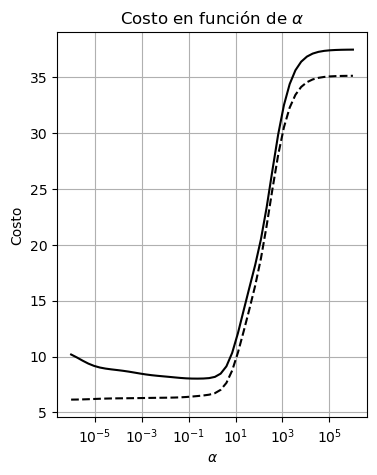

In [131]:
# Graficamos los scores y sus variabilidad

# Train
train_scores_mean = np.mean(train_scores, axis=1)

# Validation
valid_scores_mean = np.mean(valid_scores, axis=1)

# Ploteamos
plt.figure(figsize=(4, 5))
plt.plot(alphas, train_scores_mean, color='black', linestyle='--')

plt.plot(alphas, valid_scores_mean, color='black', linestyle='-')

plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.ylabel('Costo')
plt.title(r'Costo en función de $\alpha$')
plt.grid(True)
plt.show()

In [132]:
# Mejor alpha
best_alpha = alphas[np.argmin(valid_scores_mean)]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.244205309454865


## Regresión lineal Lasso

In [133]:
degrees = 6
lasso_mse_train_vals = []
lasso_mse_cv_vals = []

for degree in range(1, degrees + 1):
    # Crear pipeline
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', Lasso())
    ])

    # Ajustar el modelo
    pipeline.fit(X, y)

    # Predecir y calcular errores
    y_pred = pipeline.predict(X)

    mse_train = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(pipeline, X, y, cv=32, scoring='neg_mean_squared_error'))

    lasso_mse_train_vals.append(mse_train)
    lasso_mse_cv_vals.append(mse_cv)

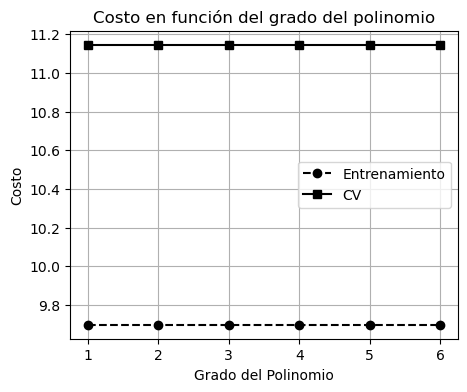

In [134]:
# Gráfica de evolución de MSE con grado del polinomio
plt.figure(figsize=(5,4))
plt.plot(range(1, degrees + 1), lasso_mse_train_vals, label='Entrenamiento', color='black', marker ='o', linestyle='--')
plt.plot(range(1, degrees + 1), lasso_mse_cv_vals, label='CV', color='black', marker ='s', linestyle='-')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Costo')
plt.grid(True)
plt.xticks(range(1, degrees + 1))
plt.title('Costo en función del grado del polinomio')
plt.legend(loc='best')
plt.show()

In [135]:
# Access the Lasso model inside the pipeline
lasso_model = pipeline.named_steps['reg']

# Now you can get the coefficients and intercept
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_
alpha = lasso_model.alpha

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Alpha:", alpha)

Coefficients: [ 0.         -4.14698106 -0.         -0.         -0.         -0.
  0.        ]
Intercept: 20.090625000000006
Alpha: 1.0


In [136]:
# Definimos el algoritmo
degree = 6

model = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(degree)),
        ('scaler', StandardScaler()),   # Estandarización
        ('reg', Lasso())
    ]
)

In [137]:
# Validation curve
## Observar el doble guíon en param_name = 'reg__alpha'
train_scores, valid_scores = validation_curve(model,
                                              X,
                                              y,
                                              param_name = 'reg__alpha',
                                              param_range = alphas,
                                              cv=32,
                                              scoring = metrica,
                                              verbose = 1
                                             )

c:\Users\marrt\miniconda3\envs\3.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.945e+01, tolerance: 1.125e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\marrt\miniconda3\envs\3.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.930e+01, tolerance: 1.125e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\marrt\miniconda3\envs\3.10\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

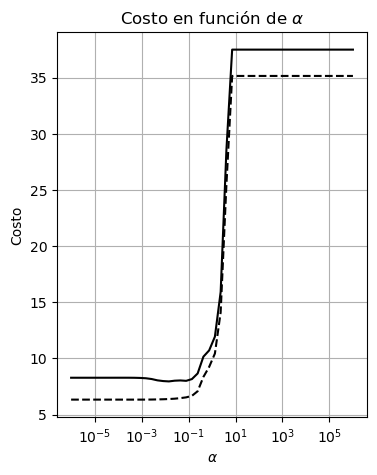

In [138]:
# Graficamos los scores y sus variabilidad

# Train
train_scores_mean = np.mean(train_scores, axis=1)

# Validation
valid_scores_mean = np.mean(valid_scores, axis=1)

# Ploteamos
plt.figure(figsize=(4, 5))
plt.plot(alphas, train_scores_mean, color='black', linestyle='--')

plt.plot(alphas, valid_scores_mean, color='black', linestyle='-')

plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.ylabel('Costo')
plt.title(r'Costo en función de $\alpha$')
plt.grid(True)
plt.show()

In [139]:
# mejor alpha
best_alpha = alphas[np.argmin(valid_scores_mean)]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.014563484775012445


## Árboles - Búsqueda manual de mejor profundidad

In [140]:
max_depth = 5
mse_train_vals = []
mse_cv_vals = []

for depth in range(1, max_depth + 1):
    # Crear arbol
    tree = DecisionTreeRegressor(max_depth=depth)

    # Ajustar el modelo
    tree.fit(X, y)

    # Predecir y calcular errores
    y_pred = tree.predict(X)

    mse_train = mean_squared_error(y, y_pred)
    mse_cv = -np.mean(cross_val_score(tree, X, y, cv=32, scoring='neg_mean_squared_error'))

    mse_train_vals.append(mse_train)
    mse_cv_vals.append(mse_cv)

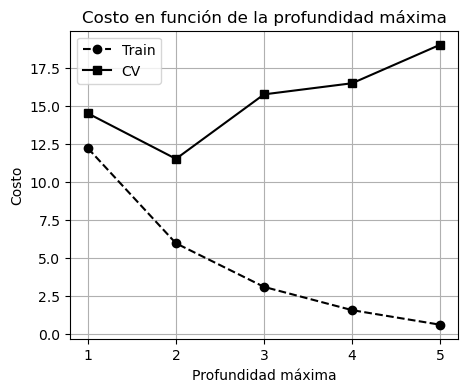

In [141]:
# Gráfica de evolución de MSE con profundidad
plt.figure(figsize=(5,4))
plt.plot(range(1, max_depth + 1), mse_train_vals, label='Train', color='black', marker ='o', linestyle='--')
plt.plot(range(1, max_depth + 1), mse_cv_vals, label='CV', color='black', marker ='s', linestyle='-')
plt.xlabel('Profundidad máxima')
plt.ylabel('Costo')
plt.grid(True)
plt.xticks(range(1, max_depth + 1))
plt.title('Costo en función de la profundidad máxima')
plt.legend()
plt.show()

## Árboles - Cost Complexity Pruning

### Árbol sin profundidad máxima

In [142]:
# Árbol de profundidad None para comparación

tree_complex = DecisionTreeRegressor()

# Ajustar el modelo
tree_complex.fit(X, y)

# Predecir y calcular errores
y_pred = tree_complex.predict(X)

mse_complex_train = mean_squared_error(y, y_pred)
mse_complex_cv = -np.mean(cross_val_score(tree_complex, X, y, cv=32, scoring='neg_mean_squared_error'))

print(f'MSE train: {mse_complex_train:.3f}')
print(f'MSE CV: {mse_complex_cv:.3f}')

MSE train: 0.039
MSE CV: 19.023


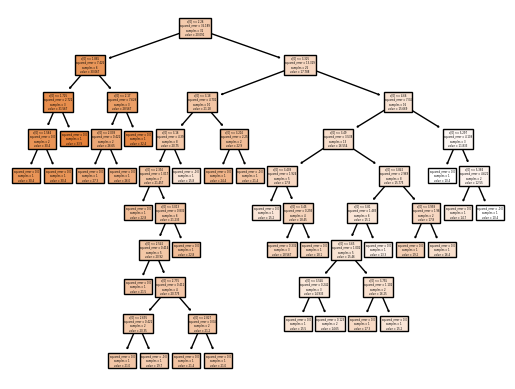

In [143]:
plot_tree(tree_complex, label='all', filled=True)
plt.show()


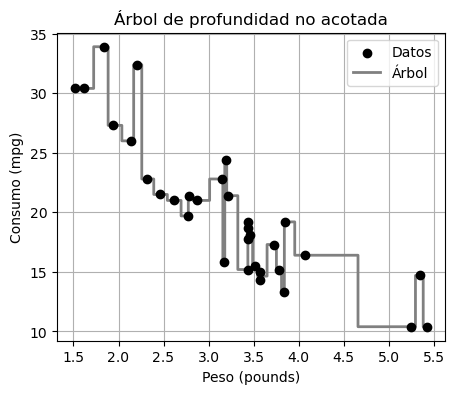

In [144]:
# Gráfica de datos de entrenamiento + arbol
plt.figure(figsize=(5,4))

x_range = np.linspace(X.min(),X.max(), 2000)
y_range = tree_complex.predict(x_range.reshape(-1,1))

plt.scatter(X, y, color='black', label='Datos', zorder=3)
plt.step(x_range,y_range, linewidth=2, color='gray', label='Árbol')

plt.ylabel('Consumo (mpg)')
plt.xlabel('Peso (pounds)')
plt.title('Árbol de profundidad no acotada')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

### Búsqueda de mejor $\alpha$

In [145]:
alphas = np.logspace(-2,2,1000)

In [146]:
# Definimos el algoritmo
model = DecisionTreeRegressor()

In [147]:
# Definimos la métrica que vamos a usar
metrica = make_scorer(mean_squared_error)

In [148]:
# Validation curve
train_scores, valid_scores = validation_curve(model,
                                              X,
                                              y,
                                              param_name = 'ccp_alpha',
                                              param_range = alphas,
                                              cv=32,
                                              scoring = metrica,
                                              verbose = 1
                                             )

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 799 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 1249 tasks      | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    2.9s
[Parallel(n_jobs=1)]: Done 2449 tasks      | elapsed:    3.9s
[Parallel(n_jobs=1)]: Done 3199 tasks      | elapsed:    5.1s
[Parallel(n_jobs=1)]: Done 4049 tasks      | elapsed:    6.4s
[Parallel(n_jobs=1)]: Done 4999 tasks      | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 6049 tasks      | elapsed:    9.2s
[Parallel(n_jobs=1)]: Done 7199 tasks      | elapsed:   11.0s
[Parallel(n_jobs=1)]: Done 8449 tasks      | elapsed:   12.7s
[Parallel(n_jobs=1)]: Done 9799 tasks      | elapsed:   14.6s
[Parallel(n_jobs=1)]: Done 11249 tasks      | elapsed:   16.6s
[Parallel(n_jobs=1)]: Done 12799 tasks      | elapsed:   18.8s
[Parallel(

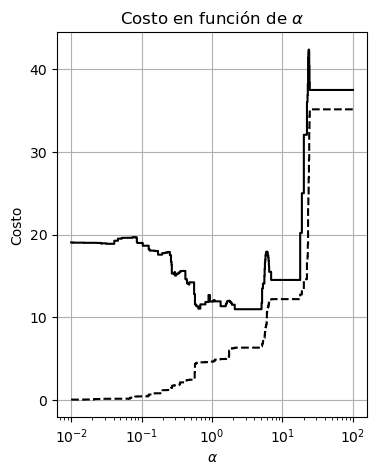

In [149]:
# Graficamos los scores y sus variabilidad

# Train
train_scores_mean = np.mean(train_scores, axis=1)

# Validation
valid_scores_mean = np.mean(valid_scores, axis=1)

# Ploteamos
plt.figure(figsize=(4, 5))
plt.step(alphas, train_scores_mean, color='black', linestyle='--')

plt.step(alphas, valid_scores_mean, color='black', linestyle='-')

plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.ylabel('Costo')
plt.title(r'Costo en función de $\alpha$')
plt.grid(True)
plt.show()

In [150]:
# El mejor alpha
best_idx = np.argmin(valid_scores_mean)
best_alpha = alphas[best_idx]
print(f'Mejor alpha: {best_alpha:.2f}')

Mejor alpha: 2.12


### Plot de árbol regularizado

In [151]:
# Árbol de profundidad None para comparación

alpha = best_alpha

tree_alpha = DecisionTreeRegressor(ccp_alpha=alpha)

# Ajustar el modelo
tree_alpha.fit(X, y)

# Predecir y calcular errores
y_pred = tree_alpha.predict(X)

mse_alpha_train = mean_squared_error(y, y_pred)
mse_alpha_cv = -np.mean(cross_val_score(tree_alpha, X, y, cv=32, scoring='neg_mean_squared_error'))

print(f'MSE train: {mse_alpha_train:.3f}')
print(f'MSE CV: {mse_alpha_cv:.3f}')

MSE train: 6.381
MSE CV: 10.979


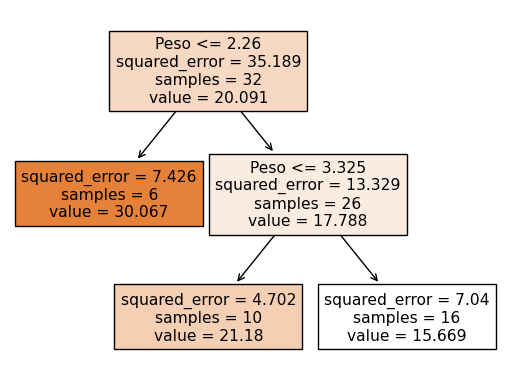

In [152]:
plot_tree(tree_alpha, feature_names=['Peso'], label='all', filled=True)
plt.show()


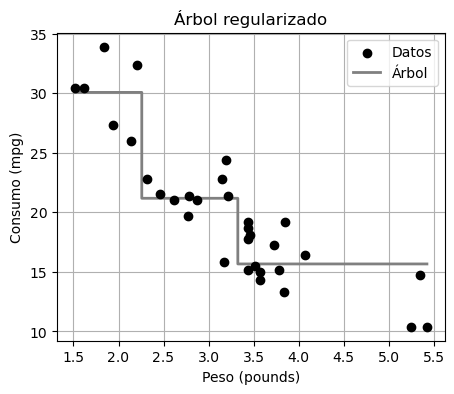

In [153]:
# Gráfica de datos de entrenamiento + arbol
plt.figure(figsize=(5,4))

x_range = np.linspace(X.min(),X.max(), 2000)
y_range = tree_alpha.predict(x_range.reshape(-1,1))

plt.scatter(X, y, color='black', label='Datos', zorder=3)
plt.step(x_range,y_range, linewidth=2, color='gray', label='Árbol')

plt.ylabel('Consumo (mpg)')
plt.xlabel('Peso (pounds)')
plt.title('Árbol regularizado')
plt.legend()
plt.grid(True)
plt.show()

plt.show()

## Práctico: Selección de modelos regresivos utilizando Regularización

En este práctico se va a realizar una selección de modelos regresivos utilizando regularización. Para ello, se utilizará el dataset `diabetes` de `sklearn.datasets`. Este dataset contiene información sobre pacientes con diabetes y su objetivo es predecir la progresión de la enfermedad.

Tendrás que:
- Cargar el dataset `diabetes` de `sklearn.datasets`.
- Dividir el dataset en un conjunto de entrenamiento y un conjunto de prueba.
- Entrenar un modelo de regresión lineal con regularización Lasso y otro con regularización Ridge.
- Realizar una búsqueda del mejor alpha para ambos modelos utilizando validación cruzada.
- Visualizar los coeficientes de ambos modelos y discutir sus interpretaciones.
- Evaluar el rendimiento de ambos modelos en el conjunto de prueba y discutir los resultados.
 

### Carga de datos

In [154]:
from sklearn.datasets import load_diabetes

data_bulk = load_diabetes(return_X_y=False)
df = pd.DataFrame(data_bulk.data, columns = data_bulk.feature_names)
df['target'] = data_bulk.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
